<a href="https://colab.research.google.com/github/AxelRM2709/Terminal_Economia_2026/blob/main/Clase18_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import datetime as dt
df = pd.read_csv("/content/Google-Playstore.csv")
#df.head() # imprimir los primeros 5
# df.columns = ['Col 1', 'Col2'] seleccionar columnas, también se puede df.Col1
#df.iloc[2:,:] # Seleccionar filas y columnas, de esta manera se eliminan las primeras dos filas
#df = df.iloc[2:,:].reset_index(drop = True) # Para que empiece desde 0 en el nuevo dataframe
#df.tail() # Ver las últimas 5 filas
'''
df.info() # Tipos de variables, no nulos, columnas, etc

# Ejemplo: Una fecha aparece como objeto
df['Date'] = pd.to_datetime(df['Date'])
df['Close'] = df.Close.astype('float')
df['High'] = df.High.astype('float') # Se evita poner max para poder llamar a la función max sin problemas
df['Low'] = df.Low.astype('float')
df['Open'] = df.Open.astype('float')
df['Volume'] = df.Volume.astype('int')

df.describe() # Datos básicos de estadistica de las columnas
df.dtypes() # Tabla de tipos de las columnas
# Filtrar:
df[df.Open > 250]
df[(df.Open < 250) & (df.Open > 100)]
df.loc[df.Open < 200] # Con loc puedes crear columnas
df.loc[df.Open > 250, 'Status'] = 'Atipico' # Crear columna, los que cumplan la condición tienen el valor de atipico
df['Tendencia'] = 'Estable' # Crear columna con todos de valor 'Estable', actuará como valor base
df.loc[df.Close > df.Close.shift(1), 'Tendencia'] = 'Sube' # Shift compara con el de la fila anterior
df = df.sort_values(by = 'Date') # Ordenar por fecha
df= df.sort_values(by = 'High', ascending = False) # De mayor a menor
df.sort_values( by = ['Tendencia', 'High'], ascending = [True, False]) # Ordenar con varias columnas
df['Rango'] = df['High'] - df['Low'] # Crear columna con una resta de otras
df.Tendencia.unique() # Lista con los valores únicos
df.Tendencia.nunique() # Cuántas etiquetas son únicas (por ejemplo, 3)
df['Year'] = df.Date.dt.year # Calcular el año, es necesario que Date sea del valor adecuado
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df['Week day'] = df.Date.dt.weakday # Día de la semana, 0 es lunes
df = df.drop(columns = ['Status', 'Tendencia']) # Eliminar columnas
col = ['Date', 'Year', 'Month', 'Day', 'Week day']
df[col] # Crear un dataframe con las columnas deseadas y con ese orden
'''

FileNotFoundError: [Errno 2] No such file or directory: '/content/Google-Playstore.csv'

In [24]:
import pandas as pd
import yfinance as yf
import datetime as dt
df_spax = yf.download('SPAX', start = '2024-01-01', end = '2026-01-01')
df_spax = df_spax.reset_index()
df_spax['Date'] = pd.to_datetime(df_spax['Date'])
df_spax['Close'] = df_spax.Close.astype('float')
df_spax['High'] = df_spax.High.astype('float')
df_spax['Low'] = df_spax.Low.astype('float')
df_spax['Open'] = df_spax.Open.astype('float')
df_spax['Volume'] = df_spax.Volume.astype('int')
df_spax.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df_spax = df_spax.sort_values(by = 'Date')

df_aapl = yf.download('AAPL', start = '2024-01-01', end = '2026-01-01')
df_aapl = df_aapl.reset_index()
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'])
df_aapl['Close'] = df_aapl.Close.astype('float')
df_aapl['High'] = df_aapl.High.astype('float')
df_aapl['Low'] = df_aapl.Low.astype('float')
df_aapl['Open'] = df_aapl.Open.astype('float')
df_aapl['Volume'] = df_aapl.Volume.astype('int')
df_aapl.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df_aapl = df_aapl.sort_values(by = 'Date')

pd.concat([df_aapl, df_spax], ignore_index = True) # Juntar dataframes, ignore es para que empiece desde 0 y no se reinicie
#df_aapl.merge(df_spax, how = 'inner', on = ['Date'] ) # Importante el orden, es como join de sql, how = left, right, outer, inner (default), left_outer, right_outer
df_merge = df_aapl.merge(df_spax, how = 'inner', left_on = ['Date'], right_on = ['Date'], suffixes = ('_aapl', '_spax') ) # Ponerle nombres a las columnas
ruta = "/content/JuntarDF.csv"
df_merge.to_csv(ruta)

df_merge.describe() # Datos estadisticos
print(f"{df_merge['Close_aapl'].mean():.2f}") # Promedio de la columna
df_merge['Close_aapl'].median()
df_merge['Close_aapl'].std()
df_merge['Close_aapl'].min()
df_merge['Close_aapl'].max()
df_merge['Close_aapl'].var()


/tmp/ipython-input-3566828623.py:4: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3566828623.py:15: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed

210.06


639.1256380045495

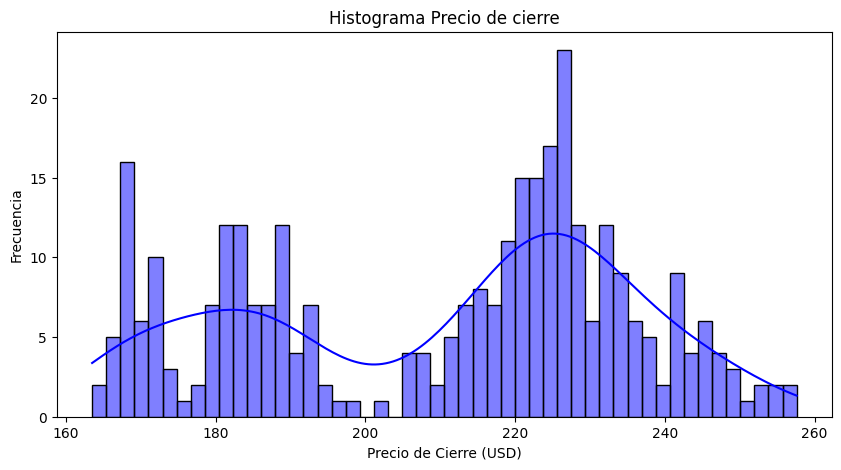

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns # Gráficos estadísticos
plt.figure(figsize = (10,5))
sns.histplot(df_merge['Close_aapl'], bins = 50, kde = True, color = 'blue')
plt.title('Histograma Precio de cierre')
plt.xlabel('Precio de Cierre (USD)')
plt.ylabel('Frecuencia')
plt.show()

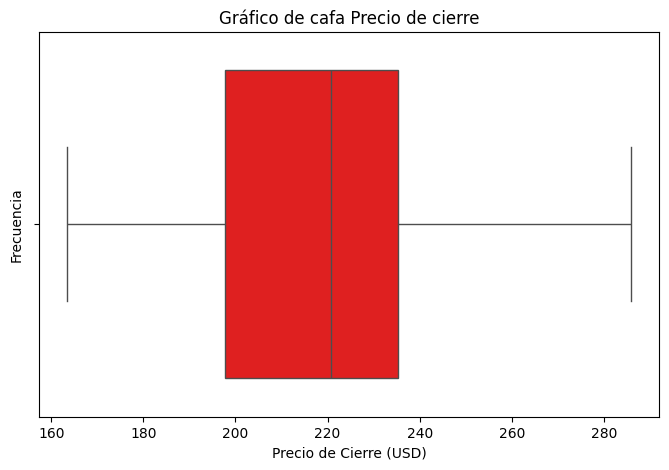

In [27]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df_aapl['Close'], color = 'red')
plt.title('Gráfico de cafa Precio de cierre')
plt.xlabel('Precio de Cierre (USD)')
plt.ylabel('Frecuencia')
plt.show()

In [28]:
df_aapl.isnull().sum #cuántos datos son nulos por columna
df_aapl.dropna() # Eliminar datos nulos
df_aapl['Close'].fillna(df_aapl.Close.mean) # Llenar valores nulos con un valor

,Close
0,183.731277
1,182.355576
2,180.039658
3,179.317169
4,183.652130
...,...
497,273.554016
498,273.144409
499,273.504089
500,272.824707


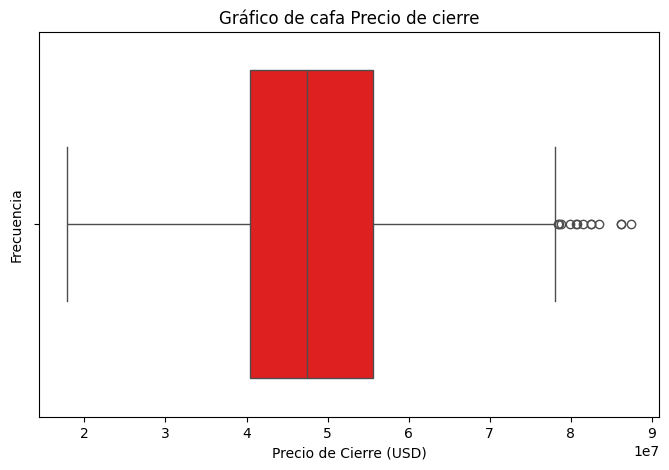

In [29]:
import numpy as np
Q1 = df_aapl['Volume'].quantile(0.25) # 1er cuartil
Q3 = df_aapl['Volume'].quantile(0.75) # 3er cuartil
IQR = Q3 - Q1 # Distancia entre cuartiles
proporcion = 1.5
li = Q1 - proporcion*IQR # Límite inferior
ls = Q3 + proporcion*IQR # Límite superior
df_outlier = df_aapl[(df_aapl.Volume < li) | (df_aapl.Volume > ls)]
df_outlier.shape
df_clean = df_aapl[(df_aapl.Volume >= li) & (df_aapl.Volume <= ls)]
plt.figure(figsize = (8,5))
sns.boxplot(x = df_clean['Volume'], color = 'red')
plt.title('Gráfico de cafa Precio de cierre')
plt.xlabel('Precio de Cierre (USD)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df_aapl.Volume.mean()

In [ ]:
df_clean.Volume.mean()

In [ ]:
corr_matrix = df_aapl[['Open', 'High', 'Low', 'Close', 'Volume']].corr() # Variables numericas y no nulas
corr_matrix # Matriz de correlaciones, 1 y si están correlacionadas proporcionalmente y -1 si están correlacionadas inversamente

In [30]:
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm_r',# Color rojo a azul
            linewidths = 0.5, fmt = ".2f")
plt.title("Matriz de correlaciones")
plt.show()

NameError: name 'corr_matrix' is not defined

<Figure size 800x600 with 0 Axes>

In [31]:
import plotly.express as px # Gráficas interactivas
fig = px.scatter_matrix(df_aapl, dimensions =['Open', 'Close', 'High', 'Low', 'Volume'],
                        title = 'Correlacion de Variables') # Pendiente, color = 'Tendencia'
fig.show()

In [32]:
df2 = df_aapl
df_aapl.loc[df_aapl.Open > 250, 'Status'] = 'Atipico' # Crear columna, los que cumplan la condición tienen el valor de atipico
df_aapl['Tendencia'] = 'Estable' # Crear columna con todos de valor 'Estable', actuará como valor base
df_aapl.loc[df_aapl.Close > df_aapl.Close.shift(1), 'Tendencia'] = 'Sube' # Shift compara con el de la fila anterior
df_aapl = df_aapl.sort_values(by = 'Date') # Ordenar por fecha
df_aapl= df_aapl.sort_values(by = 'High', ascending = False) # De mayor a menor
df_aapl.sort_values( by = ['Tendencia', 'High'], ascending = [True, False]) # Ordenar con varias columnas
df_aapl['Rango'] = df_aapl['High'] - df_aapl['Low'] # Crear columna con una resta de otras
df_aapl.Tendencia.unique() # Lista con los valores únicos
df_aapl.Tendencia.nunique() # Cuántas etiquetas son únicas (por ejemplo, 3)
df_aapl['Year'] = df_aapl.Date.dt.year # Calcular el año, es necesario que Date sea del valor adecuado
df_aapl['Month'] = df_aapl.Date.dt.month
df_aapl['Day'] = df_aapl.Date.dt.day
df_aapl['Week day'] = df_aapl.Date.dt.weekday # Día de la semana, 0 es lunes
df_aapl = df_aapl[::-1]

In [33]:
df_aapl['Volatilidad'] = df_aapl['High'] - df_aapl['Low']
df_aapl[['High','Low','Volatilidad']].corr() # No necesariamente una columna que nace de otras tienen por qué estar relacionadas

,High,Low,Volatilidad
High,1.000000,0.995947,0.158953
Low,0.995947,1.000000,0.069512
Volatilidad,0.158953,0.069512,1.000000


In [43]:
df_aapl = df_aapl.sort_values(by = 'Date') # Ordenar por fecha
fig = px.line(df_aapl, x = 'Date',
              y = 'Volatilidad',
              title = 'Volatilidad Diaria',
              labels = {'Volatilidad': 'Volatilidad Diaria (USD)', 'Date':'Fecha'},
              template = 'plotly_white')
fig.show()

In [35]:
fig = px.scatter(df_aapl, x = 'Volume', y = 'Close',
                 color = 'Tendencia', title = 'Volumen vs Cierre',
                 labels = {'Volume':'Volumen', 'Close':'Precio de Cierre'})
fig.show()

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
df_scaled = df_aapl.copy()
df_scaled[['Low','High', 'Open', 'Close', 'Volume']] = scaler.fit_transform(df_aapl[['Low','High', 'Open', 'Close', 'Volume']])
df_scaled.head()

,Date,Close,High,Low,Open,Volume,Status,Tendencia,Rango,Year,Month,Day,Week day,Volatilidad
75,2024-04-19,-1.892453,-1.910228,-1.858210,-1.845753,0.457985,NaN,Estable,2.299069,2024,4,19,4,2.299069
77,2024-04-23,-1.827716,-1.888154,-1.829386,-1.875091,-0.223797,NaN,Sube,2.110795,2024,4,23,1,2.110795
76,2024-04-22,-1.863833,-1.881023,-1.834534,-1.869292,-0.275866,NaN,Sube,2.467533,2024,4,22,0,2.467533
74,2024-04-18,-1.822946,-1.834156,-1.773453,-1.783668,-0.458788,NaN,Estable,2.071147,2024,4,18,3,2.071147
68,2024-04-10,-1.797731,-1.818874,-1.754236,-1.757400,-0.217515,NaN,Estable,1.962139,2024,4,10,2,1.962139


In [41]:
fig = px.histogram(df_aapl, x = 'Close', nbins = 50, title = 'Histograma Precio Cierre',
                   labels = {'Close':'Precio Cierre (USD)'},
                   template = 'plotly_white')
fig.update_layout(bargap = 0.2)
fig.show()

In [42]:
fig = px.histogram(df_scaled, x = 'Close', nbins = 50, title = 'Histograma Precio Cierre (Datos escalados)',
                   labels = {'Close':'Precio Cierre (USD)'},
                   template = 'plotly_white')
fig.update_layout(bargap = 0.2)
fig.show()

In [45]:
df_scaled.Close.std()

1.0009975064824246

In [46]:
minmax_scaler = MinMaxScaler()
df_minmax = df_aapl.copy()
df_minmax[['Low','High', 'Open', 'Close', 'Volume']] = minmax_scaler.fit_transform(df_aapl[['Low','High', 'Open', 'Close', 'Volume']])
df_minmax.head()

,Date,Close,High,Low,Open,Volume,Status,Tendencia,Rango,Year,Month,Day,Week day,Volatilidad
0,2024-01-02,0.165177,0.174994,0.161075,0.175034,0.214710,NaN,Estable,4.503221,2024,1,2,1,4.503221
1,2024-01-03,0.153938,0.154471,0.157295,0.151279,0.134668,NaN,Estable,2.424822,2024,1,3,2,2.424822
2,2024-01-04,0.135019,0.132103,0.136340,0.134496,0.179782,NaN,Estable,2.187269,2024,1,4,3,2.187269
3,2024-01-05,0.129117,0.129458,0.130505,0.133199,0.147851,NaN,Estable,2.563367,2024,1,5,4,2.563367
4,2024-01-08,0.164530,0.152226,0.141435,0.134010,0.137095,NaN,Sube,4.057851,2024,1,8,0,4.057851


In [47]:
df_minmax.describe()

,Date,Close,High,Low,Open,Volume,Rango,Year,Month,Day,Week day,Volatilidad
count,502,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,2024-12-31 11:05:29.880478208,0.449645,0.451524,0.445581,0.446217,0.125467,4.376556,2024.498008,6.551793,15.711155,2.005976,4.376556
min,2024-01-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.951334,2024.000000,1.000000,1.000000,0.000000,0.951334
25%,2024-07-02 06:00:00,0.278911,0.281795,0.265090,0.271354,0.077856,2.822217,2024.000000,4.000000,8.000000,1.000000,2.822217
50%,2024-12-30 12:00:00,0.467581,0.470545,0.462538,0.461304,0.103062,3.824111,2024.000000,7.000000,16.000000,2.000000,3.824111
75%,2025-07-02 18:00:00,0.587324,0.589860,0.580606,0.579566,0.141302,5.104501,2025.000000,10.000000,23.000000,3.000000,5.104501
max,2025-12-31 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,28.595370,2025.000000,12.000000,31.000000,4.000000,28.595370
std,NaN,0.237836,0.236607,0.240030,0.238208,0.090853,2.633463,0.500495,3.438700,8.771110,1.406417,2.633463


In [48]:
fig = px.histogram(df_minmax, x = 'Close', nbins = 50, title = 'Histograma Precio Cierre (Normalizado)',
                   labels = {'Close':'Precio Cierre (USD)'},
                   template = 'plotly_white')
fig.update_layout(bargap = 0.2)
fig.show()

In [52]:
fig = px.histogram(df_aapl, x = 'Volume', nbins = 50,
                   title = 'Histograma Volumen (Normalizado)',
                   labels = {'Volume':'Volumen'},
                   template = 'plotly_white',
                   marginal ='box')
fig.update_layout(bargap = 0.2)
fig.show()

In [53]:
fig = px.histogram(df_aapl, x = 'Volume', nbins = 50,
                   title = 'Histograma Volumen (Normalizado)',
                   labels = {'Volume':'Volumen'},
                   template = 'plotly_white',
                   marginal ='violin')
fig.update_layout(bargap = 0.2)
fig.show()

In [54]:
fig = px.histogram(df_aapl, x = 'Volume', nbins = 50,
                   title = 'Histograma Volumen (Normalizado)',
                   labels = {'Volume':'Volumen'},
                   template = 'plotly_white',
                   marginal ='rug')
fig.update_layout(bargap = 0.2)
fig.show()

In [61]:
df_encode = pd.get_dummies(df_aapl, columns = ['Tendencia'])
df_aapl.Tendencia.value_counts()

,count
Tendencia,
Sube,273
Estable,229


In [63]:
fig = px.bar(df_aapl.Tendencia.value_counts(), title = 'Frecuencia de Valores',
             template = 'plotly_white',
             labels = {'index':'Categoria', 'value':'Frecuencia'})
fig.show()

In [64]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_aapl['Categoria_T'] = label_encoder.fit_transform(df_aapl['Tendencia'])
df_aapl[['Tendencia', 'Categoria_T']].head()

,Tendencia,Categoria_T
0,Estable,0
1,Estable,0
2,Estable,0
3,Estable,0
4,Sube,1


In [65]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping

{'Estable': np.int64(0), 'Sube': np.int64(1)}